**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text
import plotly as pl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_context('talk')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
pl.__version__
# Make sure it's 4.14.3

'5.5.0'

## Ejercicio 1 SQL: 



### Punto 1.1: Crear la base de datos en SQLite

**Consigna:** crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite
  

In [ ]:
#Creamos la base de datos

engine = create_engine('sqlite:///melbprops.sqlite3', echo=True)

In [ ]:
#Borramos las tablas si es que existen
engine.execute('DROP TABLE IF EXISTS airbnb')
engine.execute('DROP TABLE IF EXISTS sales')
engine.execute('DROP TABLE IF EXISTS joined2')
engine.execute('DROP TABLE IF EXISTS joined1')

2022-06-23 19:07:16,119 INFO sqlalchemy.engine.Engine DROP TABLE IF EXISTS airbnb
2022-06-23 19:07:16,123 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:16,131 INFO sqlalchemy.engine.Engine COMMIT
2022-06-23 19:07:16,141 INFO sqlalchemy.engine.Engine DROP TABLE IF EXISTS sales
2022-06-23 19:07:16,143 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:16,148 INFO sqlalchemy.engine.Engine COMMIT
2022-06-23 19:07:16,155 INFO sqlalchemy.engine.Engine DROP TABLE IF EXISTS joined2
2022-06-23 19:07:16,156 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:16,158 INFO sqlalchemy.engine.Engine COMMIT
2022-06-23 19:07:16,161 INFO sqlalchemy.engine.Engine DROP TABLE IF EXISTS joined1
2022-06-23 19:07:16,162 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:16,165 INFO sqlalchemy.engine.Engine COMMIT


### Punto 1.2: Crear las tablas

**Consigna:** Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

In [ ]:
#Importamos el dataset de los deptos de melbourne y lo guardamos en un dataframe de pandas

sales_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
sales_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,...,2.00,2.00,652.00,NaN,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,...,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,...,2.00,4.00,436.00,NaN,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,...,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


In [ ]:
#Creamos una tabla dentro de la base de datos que creamos antes con los datos Sales

sales_df.to_sql('sales', con=engine, if_exists="replace")

2022-06-23 19:07:20,008 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales")
2022-06-23 19:07:20,012 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:20,016 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("sales")
2022-06-23 19:07:20,018 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:20,028 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-23 19:07:20,033 INFO sqlalchemy.engine.Engine 
CREATE TABLE sales (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-06-23 19:07:20,038 INFO sqlalchemy.engine.Engine [no key 0.00464s] ()
2022-06-23 19:07:20,049 INFO sqlalchemy.engine

In [ ]:
#Miramos las primeras 5 filas de la tabla
table_sales = engine.execute('SELECT * FROM sales LIMIT 5')

for row in table_sales:
          print(row)

2022-06-23 19:07:21,413 INFO sqlalchemy.engine.Engine SELECT * FROM sales LIMIT 5
2022-06-23 19:07:21,429 INFO sqlalchemy.engine.Engine [raw sql] ()
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0)
(1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0)
(2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0)
(3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0)
(4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016'

In [ ]:
#Creamos el df con los datos de airbnb

interesting_cols = [ 'description', 'neighborhood_overview',
                      'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
                      'price', 'weekly_price', 'monthly_price',
                      'latitude', 'longitude',]

airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',usecols=interesting_cols)
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.77,145.09,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.77,144.98,35,200.00,803.00
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.86,144.98,159,1253.00,4452.00


In [ ]:
#Llevamos los zipcodes al mismo tipo de datos para después poder unir las tablas

airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
#Creamos una tabla dentro de la base de datos que creamos antes

airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-06-23 19:07:35,168 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-23 19:07:35,180 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:35,190 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")
2022-06-23 19:07:35,200 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:35,206 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-23 19:07:35,218 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-06-23 19:07:35,228 INFO sqlalchemy.engine.Engine [no key 0.00939s] ()
2022-06-23 19:07:35,242 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")
2022-06-23 19:07:35,244 INFO sqlalchemy.engine.Engine [no key 0.00152s] ()
2022-06-23 19:07:35,263 INFO

In [ ]:
#Miramos las primeras 5 filas de la tabla
table_airbnb = engine.execute('SELECT * FROM airbnb LIMIT 5')

for row in table_airbnb:
          print(row)

2022-06-23 19:07:37,442 INFO sqlalchemy.engine.Engine SELECT * FROM airbnb LIMIT 5
2022-06-23 19:07:37,450 INFO sqlalchemy.engine.Engine [raw sql] ()
(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', 3105.0, -37.77268393, 145.0921328, 60, None, None)
(1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Roa

### Punto 1.3: Consultas en SQL

**Consigna:** Implementar consultas en SQL que respondan con la siguiente información:

- cantidad de registros totales por ciudad.
- cantidad de registros totales por barrio y ciudad.

In [ ]:
#Creamos las consultas....

#Q1: Registros totales por ciudad en la tabla airbnb
query1 = "SELECT city, COUNT(1) FROM airbnb GROUP BY city"

#Q2: Registros totales por barrio y ciudad en la tabla airbnb
query2 = "SELECT city, neighborhood, COUNT(1) FROM airbnb GROUP BY city, neighborhood"

queries = [query1, query2]

In [ ]:
#Ejecutamos las consultas
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-06-23 19:07:37,546 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM airbnb GROUP BY city
2022-06-23 19:07:37,547 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(1) FROM airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-06-23 19:07:37,630 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(1) FROM airbnb GROUP BY city, neighborhood
2022-06-23 19:07:37,632 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighb

### Punto 1.4: Join

**Consigna:** combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.

Queremos unir las tablas airbnb y sales con el objetivo de agregar información a sales sobre los precios de las propiedades en base a su codigo postal. 

Ahora, notamos que la tabla airbnb tiene muchos registros que hace referencia a un mismo zipcode:

In [ ]:
#Cantidad de filas que hacen referencia a un mismo zipcode en la tabla airbnb para los 5 primeros zipcodes

query_zip = 'SELECT zipcode, COUNT(zipcode) AS cantidad FROM airbnb GROUP BY zipcode order by COUNT(zipcode) desc'
pd.read_sql_query(query_zip, engine)[:5]

2022-06-23 19:07:37,837 INFO sqlalchemy.engine.Engine SELECT zipcode, COUNT(zipcode) AS cantidad FROM airbnb GROUP BY zipcode order by COUNT(zipcode) desc
2022-06-23 19:07:37,851 INFO sqlalchemy.engine.Engine [raw sql] ()


,zipcode,cantidad
0,3000.00,3367
1,3006.00,1268
2,3182.00,1135
3,3141.00,881
4,3004.00,728


Para que la tabla conjunta tenga información relevante, vamos a agregar a cada propiedad de sales una columna que nos muestre el precio promedio de la propiedades en airbnb para su zipcode.

In [ ]:
engine.execute('DROP TABLE IF EXISTS agregada')

2022-06-23 19:07:38,009 INFO sqlalchemy.engine.Engine DROP TABLE IF EXISTS agregada
2022-06-23 19:07:38,013 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:38,016 INFO sqlalchemy.engine.Engine COMMIT


In [ ]:
#Joineamos las tablas.
join = """
          CREATE TABLE agregada AS
          SELECT 
              sales.postcode,
              AVG(airbnb.price) AS airbnb_price_mean, 
              AVG(airbnb.weekly_price) AS airbnb_weekly_price_mean,
              AVG(airbnb.monthly_price) AS airbnb_monthly_price_mean
          FROM sales 
            LEFT JOIN airbnb
            ON sales.postcode = airbnb.zipcode
          GROUP BY sales.postcode
            """

engine.execute(join)

2022-06-23 19:07:38,033 INFO sqlalchemy.engine.Engine 
          CREATE TABLE agregada AS
          SELECT 
              sales.postcode,
              AVG(airbnb.price) AS airbnb_price_mean, 
              AVG(airbnb.weekly_price) AS airbnb_weekly_price_mean,
              AVG(airbnb.monthly_price) AS airbnb_monthly_price_mean
          FROM sales 
            LEFT JOIN airbnb
            ON sales.postcode = airbnb.zipcode
          GROUP BY sales.postcode
            
2022-06-23 19:07:38,042 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:41,275 INFO sqlalchemy.engine.Engine COMMIT


In [ ]:
#pasamos la tabla a un dataframe de pandas
agregada_df = pd.read_sql_table('agregada',engine)

2022-06-23 19:07:41,295 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-23 19:07:41,298 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:41,302 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2022-06-23 19:07:41,305 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:41,308 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("agregada")
2022-06-23 19:07:41,310 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:41,314 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-23 19:07:41,316 INFO sqlalchemy.engine.Engine [raw sql] ('agregada',)
2022-06-23 19:07:41,318 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("agregada")
2022-06-23 19:07:41,320 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-23 19:07:41,322 INFO sqlalchemy.engine.Engine P

In [ ]:
agregada_df["Postcode"]

0     3000.00
1     3002.00
2     3003.00
3     3006.00
4     3008.00
        ...  
193   3809.00
194   3810.00
195   3910.00
196   3976.00
197   3977.00
Name: Postcode, Length: 198, dtype: float64

In [ ]:
agregada_df[:]

,Postcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,3000.00,150.50,918.74,3407.20
1,3002.00,200.98,956.38,3712.71
2,3003.00,130.21,760.20,2629.50
3,3006.00,188.85,1239.83,4358.56
4,3008.00,177.01,1025.28,3222.83
...,...,...,...,...
193,3809.00,76.21,286.00,1008.00
194,3810.00,94.95,723.33,3800.00
195,3910.00,118.00,250.00,NaN
196,3976.00,55.00,NaN,NaN


Esta tabla nos permite hacer consultas rapidas sobre la media diaria, semanal y mensual de los precios de un airbnb para un zipcode dado. Podemos agramar esta información al df de sales mediante la siguiente query:

In [ ]:
query_join = """
            SELECT sales.*, 
              agregada.airbnb_price_mean, agregada.airbnb_weekly_price_mean, 
              agregada.airbnb_monthly_price_mean  
            FROM sales
              LEFT JOIN agregada
              ON sales.postcode = agregada.postcode"""

sales_agregada_df = pd.read_sql_query(query_join,engine)

2022-06-23 19:07:41,462 INFO sqlalchemy.engine.Engine 
            SELECT sales.*, 
              agregada.airbnb_price_mean, agregada.airbnb_weekly_price_mean, 
              agregada.airbnb_monthly_price_mean  
            FROM sales
              LEFT JOIN agregada
              ON sales.postcode = agregada.postcode
2022-06-23 19:07:41,466 INFO sqlalchemy.engine.Engine [raw sql] ()


In [ ]:
sales_agregada_df.shape

(13580, 25)

In [ ]:
sales_agregada_df

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,...,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,...,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
2,2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,...,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
3,3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,...,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
4,4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,...,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,...,NaN,1981.00,None,-37.91,145.17,South-Eastern Metropolitan,7392.00,124.03,526.35,1901.61
13576,13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,...,133.00,1995.00,None,-37.86,144.88,Western Metropolitan,6380.00,191.09,612.25,2119.75
13577,13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,...,NaN,1997.00,None,-37.85,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75
13578,13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,...,157.00,1920.00,None,-37.86,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75


Le quitamos la Columna "Index"

In [ ]:
del sales_agregada_df["index"]

 
---

## Ejercicio 2:


### Punto 2.1:

Consigna: 

a. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron. 

b. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades. 

In [ ]:
#Recordamos como se compone el dataframe

sales_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
sales_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
sales_df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


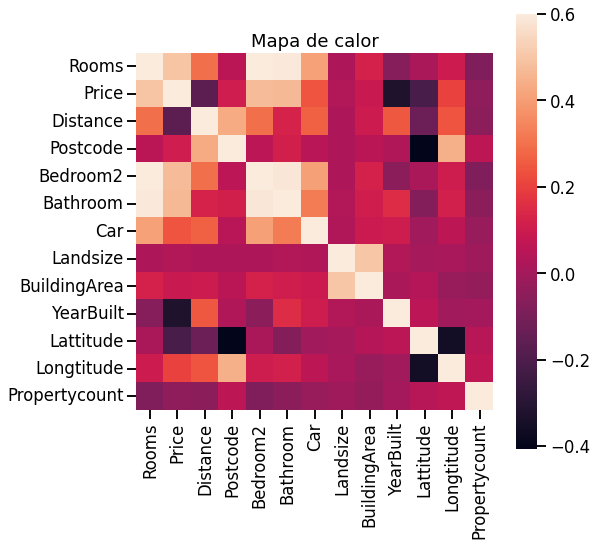

In [ ]:
mat_corr = sales_df.corr()
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(mat_corr, vmax=0.6, square=True)
plt.title("Mapa de calor")
plt.show()

2.1.a
Selección de columnas interesantes para la predicción de precio:
*   Suburb
*   Rooms
*   Bathroom
*   Bedroom2
*   Type (h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse)
*   Price
*   BuildingArea
*   Landsize
*   YearBuilt
*   Postcode

Se elige Suburbio por entender que no es lo mismo comprar una casa en un barrio que otro.
Se elige Rooms, Bathroom y Bedroom2 ya que se considera que mientras más grande la casa, y por lo tanto mas habitaciones/baños tenga, mayor será el precio de la casa.
Se elige Type por entender que los distintos tipos de viviendas pueden llegar a influir en el precio.
Se elige columna Precio por ser la principal columna a tener en cuenta para la predicción de un precio.
Se elige además Landsize y BuildingArea para explorar la incidencia de tamaño de terreno y superficie edificada en el precio.
Por último se elige la variable Yearbilt ya que se presupone una relación entre la edad de la casa y su precio.
Se utiliza además postcode para luego poder hacer el merge con el df de Airbnb a través de este valor.



In [ ]:
sales_df["Postcode"].value_counts()

3073.00    359
3020.00    306
3121.00    292
3040.00    290
3046.00    284
          ... 
3340.00      1
3158.00      1
3808.00      1
3777.00      1
3793.00      1
Name: Postcode, Length: 198, dtype: int64

In [ ]:
sales_df["Suburb"].value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [ ]:
sales_df[["Price", "Suburb"]].groupby("Suburb").describe()

Price                                                       \
              count       mean       std       min        25%        50%   
Suburb                                                                     
Abbotsford    56.00 1060366.07 361279.97 300000.00  866250.00 1093500.00   
Aberfeldie    44.00 1277454.55 709210.42 280000.00  751500.00 1300000.00   
Airport West  67.00  756656.73 170008.85 440000.00  666000.00  755000.00   
Albanvale      6.00  537083.33  78723.83 415000.00  511125.00  540750.00   
Albert Park   69.00 1941355.07 732435.92 442500.00 1500000.00 1900000.00   
...             ...        ...       ...       ...        ...        ...   
Wonga Park     1.00  900000.00       NaN 900000.00  900000.00  900000.00   
Wyndham Vale   4.00  483250.00  11354.15 475000.00  477250.00  479000.00   
Yallambie     24.00  839687.50 213571.84 602500.00  720750.00  773000.00   
Yarra Glen     1.00  620000.00       NaN 620000.00  620000.00  620000.00   
Yarraville   164.00  988615.51 343162.91 330000.00  777500.00  953000.00   

                                    
                    75%        max  
Suburb                              
Abbotsford   1311250.00 1876000.00  
Aberfeldie   1657500.00 3900000.00  
Airport West  858000.00 1250000.00  
Albanvale     562500.00  655000.00  
Albert Park  2155000.00 4735000.00  
...                 ...        ...  
Wonga Park    900000.00  900000.00  
Wyndham Vale  485000.00  500000.00  
Yallambie     920250.00 1670000.00  
Yarra Glen    620000.00  620000.00  
Yarraville   1190000.00 2450000.00  

[314 rows x 8 columns]

In [ ]:
sales_df["Rooms"].value_counts()[:10]

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

In [ ]:
sales_df[["Price", "Rooms"]].groupby("Rooms").describe()

Price                                                         \
        count       mean        std        min        25%        50%   
Rooms                                                                  
1      681.00  433824.45  224985.70   85000.00  325000.00  385000.00   
2     3648.00  775081.19  356125.95  190000.00  535000.00  690000.00   
3     5881.00 1076080.62  502106.14  283000.00  725000.00  950000.00   
4     2688.00 1445281.74  747487.20  131000.00  902000.00 1285000.00   
5      596.00 1870260.42  982349.30  355000.00 1150000.00 1660000.00   
6       67.00 1849365.67 1094246.55  506000.00 1167500.00 1800000.00   
7       10.00 1920700.00  947620.07 1005000.00 1312500.00 1496000.00   
8        8.00 1602750.00  830626.40  741000.00  853250.00 1515000.00   
10       1.00  900000.00        NaN  900000.00  900000.00  900000.00   

                             
             75%        max  
Rooms                        
1      460000.00 2450000.00  
2      912625.00 4800000.00  
3     1320000.00 9000000.00  
4     1786250.00 7650000.00  
5     2400000.00 8000000.00  
6     2125000.00 6500000.00  
7     2450000.00 4050000.00  
8     2212500.00 2950000.00  
10     900000.00  900000.00

In [ ]:
sales_df["Type"].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [ ]:
sales_df[["Price", "Type"]].groupby("Type").describe()


Price                                                                 \
       count       mean       std       min       25%        50%        75%   
Type                                                                          
h    9449.00 1242664.76 668078.74 131000.00 792000.00 1080000.00 1500000.00   
t    1114.00  933735.05 395038.25 300000.00 670000.00  846750.00 1101900.00   
u    3017.00  605127.48 260987.45  85000.00 440000.00  560000.00  706000.00   

                 
            max  
Type             
h    9000000.00  
t    3475000.00  
u    3625000.00

In [ ]:
sales_df["BuildingArea"].value_counts()[270:293]

270.00    14
240.00    14
43.00     13
233.00    13
232.00    13
          ..
227.00     4
365.00     4
304.00     4
292.00     4
293.00     4
Name: BuildingArea, Length: 100, dtype: int64

In [ ]:
sales_df[["Price", "BuildingArea"]].groupby("BuildingArea").describe()[:20]

Price                                                         \
             count       mean        std        min        25%        50%   
BuildingArea                                                                
0.00         17.00 1448852.94  909356.57  412500.00  814000.00 1205000.00   
1.00         11.00 1057175.82  948821.17  342000.00  593967.00  815000.00   
2.00         16.00  786281.25  299758.01  330000.00  631250.00  727500.00   
3.00         20.00  861350.00  253022.42  460000.00  726000.00  817500.00   
4.00          4.00  964250.00  301842.54  635000.00  852500.00  927500.00   
5.00          3.00 2010000.00 1438158.54  630000.00 1265000.00 1900000.00   
7.00          1.00  460000.00        NaN  460000.00  460000.00  460000.00   
9.00          1.00  890000.00        NaN  890000.00  890000.00  890000.00   
10.00         1.00  570000.00        NaN  570000.00  570000.00  570000.00   
11.00         1.00  900000.00        NaN  900000.00  900000.00  900000.00   
12.00         1.00  520000.00        NaN  520000.00  520000.00  520000.00   
13.00         2.00  542500.00   88388.35  480000.00  511250.00  542500.00   
14.00         2.00 1612500.00 1240972.40  735000.00 1173750.00 1612500.00   
15.00         2.00 1169000.00  213546.25 1018000.00 1093500.00 1169000.00   
16.00         2.00  878750.00   97227.18  810000.00  844375.00  878750.00   
18.00         6.00 1046875.00  435426.34  646250.00  763750.00  907500.00   
19.00         3.00  563333.33  297241.20  283000.00  407500.00  532000.00   
20.00         3.00 1288333.33  335795.08  940000.00 1127500.00 1315000.00   

                                    
                    75%        max  
BuildingArea                        
0.00         1950000.00 3450000.00  
1.00         1033500.00 3812000.00  
2.00          917750.00 1645000.00  
3.00          925000.00 1600000.00  
4.00         1039250.00 1367000.00  
5.00         2700000.00 3500000.00  
7.00          460000.00  460000.00  
9.00          890000.00  890000.00  
10.00         570000.00  570000.00  
11.00         900000.00  900000.00  
12.00         520000.00  520000.00  
13.00         573750.00  605000.00  
14.00        2051250.00 2490000.00  
15.00        1244500.00 1320000.00  
16.00         913125.00  947500.00  
18.00        1197500.00 1810000.00  
19.00         703500.00  875000.00  
20.00        1462500.00 1610000.00

In [ ]:
sales_df["YearBuilt"].value_counts()

1970.00    866
1960.00    725
1950.00    580
1900.00    341
1980.00    338
          ... 
1897.00      1
1933.00      1
1830.00      1
1901.00      1
1857.00      1
Name: YearBuilt, Length: 144, dtype: int64

In [ ]:
sales_df[["Price", "YearBuilt"]].groupby("YearBuilt").describe()

Price                                                        \
           count       mean       std        min        25%        50%   
YearBuilt                                                                
1196.00     1.00 1200000.00       NaN 1200000.00 1200000.00 1200000.00   
1830.00     1.00  855000.00       NaN  855000.00  855000.00  855000.00   
1850.00     4.00 1179500.00 490145.90  677000.00  800000.00 1220500.00   
1854.00     1.00 3310000.00       NaN 3310000.00 3310000.00 3310000.00   
1856.00     1.00 2260000.00       NaN 2260000.00 2260000.00 2260000.00   
...          ...        ...       ...        ...        ...        ...   
2014.00   100.00  921915.00 585660.16  300000.00  532500.00  730000.00   
2015.00    65.00 1231484.62 821742.53  325000.00  635000.00  990000.00   
2016.00    58.00 1523655.17 782427.15  350000.00  940000.00 1281000.00   
2017.00    18.00 1037972.28 470369.08  435000.00  825250.00  922500.00   
2018.00     1.00 1310000.00       NaN 1310000.00 1310000.00 1310000.00   

                                 
                 75%        max  
YearBuilt                        
1196.00   1200000.00 1200000.00  
1830.00    855000.00  855000.00  
1850.00   1600000.00 1600000.00  
1854.00   3310000.00 3310000.00  
1856.00   2260000.00 2260000.00  
...              ...        ...  
2014.00   1123625.00 3705000.00  
2015.00   1505000.00 3600000.00  
2016.00   2077500.00 3800000.00  
2017.00   1110500.00 2450000.00  
2018.00   1310000.00 1310000.00  

[144 rows x 8 columns]

In [ ]:
#Filtrado de columnas interesantes: Suburb, Rooms, Bathroom, Bedroom2, Type, Price, Landsize, BuildingArea, airbnb_monthly_price_mean, YearBuilt

filtered_df = sales_df[['Suburb', 'Type',  'Landsize', 'BuildingArea', 'Rooms', 'Bathroom', 'Bedroom2', 'YearBuilt', 'Price', 'Postcode']]
filtered_df

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode
0,Abbotsford,h,202.00,NaN,2,1.00,2.00,NaN,1480000.00,3067.00
1,Abbotsford,h,156.00,79.00,2,1.00,2.00,1900.00,1035000.00,3067.00
2,Abbotsford,h,134.00,150.00,3,2.00,3.00,1900.00,1465000.00,3067.00
3,Abbotsford,h,94.00,NaN,3,2.00,3.00,NaN,850000.00,3067.00
4,Abbotsford,h,120.00,142.00,4,1.00,3.00,2014.00,1600000.00,3067.00
...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,h,652.00,NaN,4,2.00,4.00,1981.00,1245000.00,3150.00
13576,Williamstown,h,333.00,133.00,3,2.00,3.00,1995.00,1031000.00,3016.00
13577,Williamstown,h,436.00,NaN,3,2.00,3.00,1997.00,1170000.00,3016.00
13578,Williamstown,h,866.00,157.00,4,1.00,4.00,1920.00,2500000.00,3016.00


Graficamos distribución de Precio

In [ ]:
sns.set()

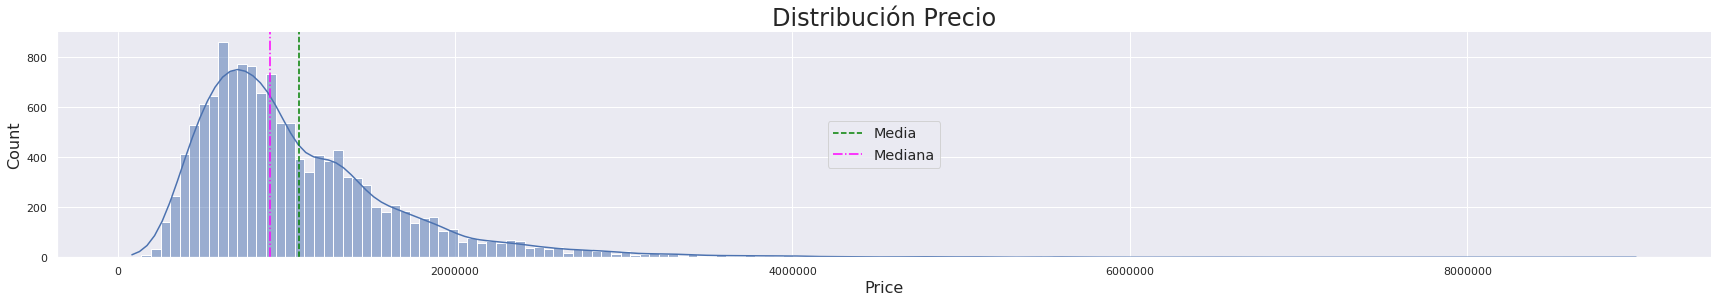

In [ ]:
#Creamos un histograma para estudiar la distribución del Precio

sns.displot(filtered_df.Price.dropna(), stat='count', aspect=6, kde=True, height =4);

#Agregamos la lineas de la media
plt.axvline(x=filtered_df.Price.mean(), 
              linestyle = '--', color="Green", label='Media');

#Agregamos la lineas de la mediana
plt.axvline(x=filtered_df.Price.median(), 
              linestyle = '-.', color="magenta", label='Mediana');

plt.xlabel("Price", size=16)
plt.ylabel("Count", size=16)
plt.ticklabel_format(style='plain', axis='x');
plt.title("Distribución Precio", size = 24);
plt.legend(loc='center', prop={'size':'large'});
plt.show()

Gráficamos relaciones con Precio

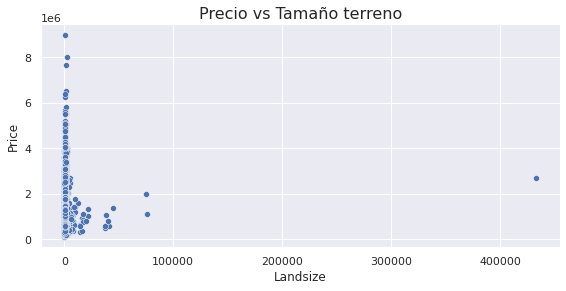

In [ ]:
sns.pairplot(data=filtered_df, x_vars=['Landsize'],
                 y_vars=['Price'],
                 aspect=2, height=4)
plt.title("Precio vs Tamaño terreno", size = 16);
plt.show()

Se deberá remover el valor extremo de tamaño de terreno => 433014

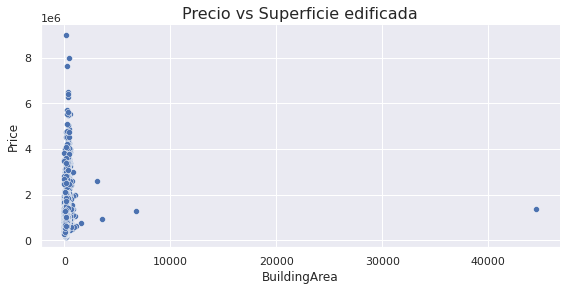

In [ ]:
sns.pairplot(data=filtered_df, x_vars=['BuildingArea'],
                 y_vars=['Price'],
                 aspect=2, height=4)
plt.title("Precio vs Superficie edificada", size = 16);
plt.show()

Se deberá remover el valor extremo de BuildingArea =>44515

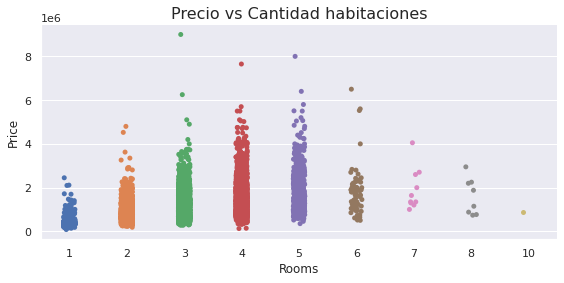

In [ ]:
sns.catplot(data=filtered_df, y="Price", x="Rooms", height=4, aspect=2)
plt.title("Precio vs Cantidad habitaciones", size = 16);
plt.show()

Se podría remover el valor 10 para limpiar el dataset.

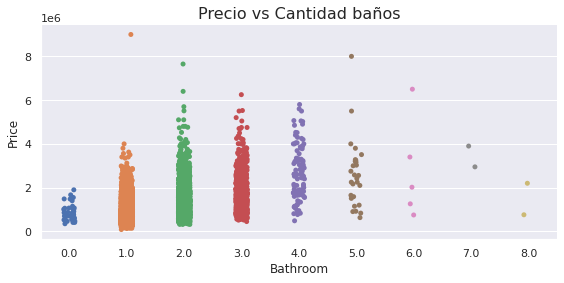

In [ ]:
sns.catplot(data=filtered_df, y="Price", x="Bathroom", height=4, aspect=2)
plt.title("Precio vs Cantidad baños", size = 16);
plt.show()

Se podría remover el valor 8 para limpiar el dataset.

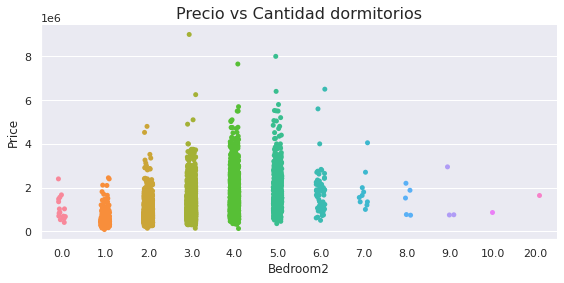

In [ ]:
sns.catplot(data=filtered_df, y="Price", x="Bedroom2", height=4, aspect=2)
plt.title("Precio vs Cantidad dormitorios", size = 16);
plt.show()

Se debería remover el valor extremo 20 y se podría además eliminar los valores 9 y 10 para limpiar el dataset.

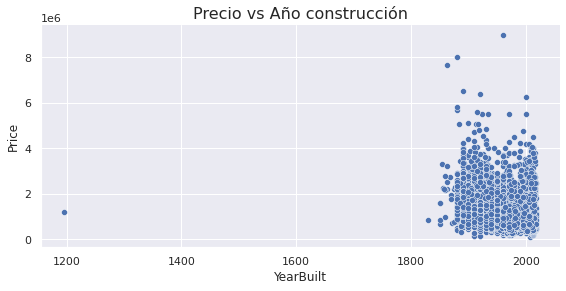

In [ ]:
sns.pairplot(data=filtered_df, x_vars=['YearBuilt'],
                 y_vars=['Price'],
                 aspect=2, height=4)
plt.title("Precio vs Año construcción", size = 16);
plt.show()

Se deberIa eliminar el valor extremo de 1196.

2.1.b
Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades. 

In [ ]:
filtered_df.describe()

,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode
count,13580.00,7130.00,13580.00,13580.00,13580.00,8205.00,13580.00,13580.00
mean,558.42,151.97,2.94,1.53,2.91,1964.68,1075684.08,3105.30
std,3990.67,541.01,0.96,0.69,0.97,37.27,639310.72,90.68
min,0.00,0.00,1.00,0.00,0.00,1196.00,85000.00,3000.00
25%,177.00,93.00,2.00,1.00,2.00,1940.00,650000.00,3044.00
50%,440.00,126.00,3.00,1.00,3.00,1970.00,903000.00,3084.00
75%,651.00,174.00,3.00,2.00,3.00,1999.00,1330000.00,3148.00
max,433014.00,44515.00,10.00,8.00,20.00,2018.00,9000000.00,3977.00


In [ ]:
print("Percentil 99.9 Landsize: ", round(filtered_df["Landsize"].quantile(0.999), 2)) 
print("Percentil 99.9 BuildingArea: ", round(filtered_df["BuildingArea"].quantile(0.999), 2)) 
print("Percentil 99.9 Rooms: ", round(filtered_df["Rooms"].quantile(0.999), 2)) 
print("Percentil 99.9 Bathroom: ", round(filtered_df["Bathroom"].quantile(0.999), 2)) 
print("Percentil 99.9 Bedroom2: ", round(filtered_df["Bedroom2"].quantile(0.999), 2)) 
print("Percentil 99.9 Price: ", round(filtered_df["Price"].quantile(0.999), 2)) 
print("Percentil 0.01 YearBuilt: ", round(filtered_df["YearBuilt"].quantile(0.001), 2)) 

Percentil 99.9 Landsize:  17200.0
Percentil 99.9 BuildingArea:  1010.65
Percentil 99.9 Rooms:  7.0
Percentil 99.9 Bathroom:  5.0
Percentil 99.9 Bedroom2:  7.0
Percentil 99.9 Price:  5326300.0
Percentil 0.01 YearBuilt:  1857.61


Se toma como límite para filtrar datos extremos, el percentil 99.9 de cada variable numérica.

In [ ]:
clean_df1 = filtered_df[(filtered_df.Landsize <= 17200) & (filtered_df.BuildingArea <= 1010.65) & (filtered_df.Rooms <= 7) 
  & (filtered_df.Bathroom <= 5) & (filtered_df.Bedroom2 <= 7) & (filtered_df.Price <= 5326300)
  & (filtered_df.YearBuilt > 1857)]

clean_df1.shape

(6825, 10)

Se descubre que filtrando de esta manera quedan aprox 50% de los valores (inicial 13580, luego de filtro 6795) únicamente. Luego de analizar los resultados se encuentra que esto se debe a que gran parte de los valores de BuildingArea y YearBuilt están vacíos por lo que se decide proceder a no tocar la columna BuildingArea por ahora.

---
 
Método 1:
Usar los percentiles 99.9 establecidos arriba, salvo BuildingArea y YearBuilt
 
---

Método 2:
* Se elimina valor extremo de Landsize de 433.014
* Se elimina valor extremo de BuildingArea de 44.515
* Se elimina valor extremo de Rooms de 10
* Se elimina valores altos de Bathroom de 7 y 8 
* Se elimina valor extremo de Bedroom de 20 y valores altos de 9 y 10
* Se elimina valor extremo de Precio de 9.000.000
* Se elimina valor extremo de YearBuilt de 1196


In [ ]:
#Método 1:
clean_df11 = filtered_df[(filtered_df.Landsize <= 17200) & (filtered_df.Rooms <= 7) 
  & (filtered_df.Bathroom <= 5) & (filtered_df.Bedroom2 <= 7) & 
  (filtered_df.Price <= 5326300)]

clean_df11.shape

(13537, 10)

In [ ]:
#Método 2:
clean_df2 = filtered_df[(filtered_df.Landsize < 433014)]
clean_df2.shape

(13579, 10)

In [ ]:
clean_df3 = clean_df2[(filtered_df.Rooms < 10)]
clean_df3.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(13578, 10)

In [ ]:
clean_df4 = clean_df3[(filtered_df.Bathroom < 7)]
clean_df4.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(13574, 10)

In [ ]:
clean_df5 = clean_df4[(filtered_df.Bedroom2 < 9)]
clean_df5.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(13572, 10)

In [ ]:
clean_df6 = clean_df5.loc[clean_df5["BuildingArea"] != 44515]
clean_df6.shape

(13571, 10)

In [ ]:
clean_df7 = clean_df6.loc[clean_df6["YearBuilt"] != 1196]
clean_df7.shape

(13570, 10)

* Con el método 1 se obtuvo un nuevo df (clean_df11) con 13537 filas de 13580 iniciales.
* Con el método 2 se obtuvo un nuevo df (clean_df8) con 13570 filas de las 13580 iniciales.

In [ ]:
clean_df7.describe()

,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode
count,13570.00,7125.00,13570.00,13570.00,13570.00,8200.00,13570.00,13570.00
mean,523.20,145.67,2.94,1.53,2.91,1964.77,1075123.35,3105.28
std,1418.02,128.72,0.95,0.68,0.95,36.30,638620.50,90.66
min,0.00,0.00,1.00,0.00,0.00,1830.00,85000.00,3000.00
25%,176.25,93.00,2.00,1.00,2.00,1940.00,650000.00,3044.00
50%,440.00,126.00,3.00,1.00,3.00,1970.00,902750.00,3084.00
75%,651.00,174.00,3.00,2.00,3.00,1999.00,1330000.00,3148.00
max,76000.00,6791.00,8.00,6.00,8.00,2018.00,9000000.00,3977.00


Se decide utilizar el df obtenido en el segundo método (clean_df7) ya que tiene más registros.

### Punto 2.2:

**Consigna:** Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico.



a. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.



b. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.



c. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.
Pueden leer otras columnas del conjunto de AirBnB además de las que están en interesting_cols, si les parecen relevantes.

2.a

Las columnas mas importantes para agregar son: "zipcode", "price", "weekly_price", "monthly_price", "latitude", "longitude".

In [ ]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv( #armamos un data set únicamente con las columnas interesantes
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:5]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.77,145.09,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.77,144.98,35,200.00,803.00
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.86,144.98,159,1253.00,4452.00
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.76,144.99,50,250.00,920.00
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.86,144.99,69,400.00,1900.00


En este nuevo data frame tenemos 22895 registros

In [ ]:
len(airbnb_df)# cantidad de registros en este df

22895

Asumimos que el precio promedio de "zipcode" nos puede aportar información reelevante para la predicción de precio de venta una propiedad. Esto es porque una propiedad en las afueras de la ciudad tendría menos valor que una propiedad en el centro.

La siguiente tabla demuestra que "zipcode" tiene tipos de datos enteros y flotantes. Entonces, antes de continuar con la combinación de los datos, procedemos a estandarizar llevando los datos números flotantes.

In [ ]:
airbnb_df.zipcode.value_counts(10)

3000.0       0.11
3000         0.04
3006.0       0.04
3182.0       0.03
3182         0.02
             ... 
3096         0.00
3812         0.00
3000\n3000   0.00
3752         0.00
4068.0       0.00
Name: zipcode, Length: 463, dtype: float64

In [ ]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce') #Con "to_numeric" llevamos todo a flotante

In [ ]:
airbnb_df.zipcode.value_counts().head(10)

3000.00    3367
3006.00    1268
3182.00    1135
3141.00     881
3004.00     728
3121.00     628
3008.00     616
3053.00     538
3181.00     460
3056.00     446
Name: zipcode, dtype: int64

In [ ]:
airbnb_df[["price","zipcode"]].groupby("zipcode").describe()

price                                                  
           count   mean    std    min    25%    50%    75%     max
zipcode                                                           
2010.00     1.00  40.00    NaN  40.00  40.00  40.00  40.00   40.00
2134.00     1.00  50.00    NaN  50.00  50.00  50.00  50.00   50.00
2582.00     1.00 104.00    NaN 104.00 104.00 104.00 104.00  104.00
3000.00  3367.00 150.50 189.53   0.00 100.00 129.00 165.00 9000.00
3001.00     2.00 132.50  17.68 120.00 126.25 132.50 138.75  145.00
...          ...    ...    ...    ...    ...    ...    ...     ...
7367.00     1.00 230.00    NaN 230.00 230.00 230.00 230.00  230.00
8938.00     1.00 296.00    NaN 296.00 296.00 296.00 296.00  296.00
9004.00     1.00 226.00    NaN 226.00 226.00 226.00 226.00  226.00
9540.00     1.00 245.00    NaN 245.00 245.00 245.00 245.00  245.00
30122.00    1.00  75.00    NaN  75.00  75.00  75.00  75.00   75.00

[247 rows x 8 columns]

A continuación observaremos si hay suficientes registros en común entre ambas bases de datos como para que tenga sentido agregar información relevante a través de la columna "zipcode" (En l base de datos de Melbroune esta columna toma el nombre de "Postcode". 

Entonces buscaremos la intersección entre los valores de "zipcode" en el df de Airbnb contra "Poscode" de Melbroune

In [ ]:
import numpy
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, sales_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(sales_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


Tenemos 248 valores distintos en Airbnb y 198 en Melbroune y 191 que se repiten entre ambos. Este ultimo es un valor considerable como para que tenga sentido combinar los datos a través de "zipcode".

2.b


In [ ]:
#Filtramos el DF segun los zip code con mas de 10 registros
df_filtrado = airbnb_df.groupby('zipcode').filter(lambda x: len(x) >10)

In [ ]:
#Vemos cuales zipcodes estan en ambos lados y cuales solo en uno

intersection = np.intersect1d(
    df_filtrado.zipcode.values, sales_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(clean_df7.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 197
Common zipcodes 157


In [ ]:
#Analizamos la correspondencia entre los df y vemos que los de airbnb generalmente estan en sales pero no lo contrario
print('Records in Sales df with corresponding zipcode form Airbnb df',
      clean_df7.Postcode.isin(intersection).sum() / len(clean_df7))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      df_filtrado.zipcode.isin(intersection).sum() / len(df_filtrado))

Records in Sales df with corresponding zipcode form Airbnb df 0.955858511422255
Records in Airbnb df with corresponding zipcode form Sales df 0.9405861099959856


En la parte siguiente se van a elegir las columnas de airbnb que son relevantes para poder mergear con el dataset de sales. Luego se calcula el precio promedio para el código postal y luego se agrega el dato al df original

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [ ]:
airbnb_price_by_zipcode = df_filtrado[relevant_cols + ['zipcode']]\
  .groupby('zipcode').mean().reset_index()


In [ ]:
airbnb_price_by_zipcode[:10]

,zipcode,price,weekly_price,monthly_price
0,3000.00,150.50,918.74,3407.20
1,3002.00,200.98,956.38,3712.71
2,3003.00,130.21,760.20,2629.50
3,3004.00,158.27,1061.17,3759.93
4,3006.00,188.85,1239.83,4358.56
5,3008.00,177.01,1025.28,3222.83
6,3011.00,95.60,441.92,1624.61
7,3012.00,112.63,518.00,2335.00
8,3013.00,135.61,923.57,2966.09
9,3015.00,132.05,706.12,2002.33


In [ ]:
merged_sales_df = clean_df7.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(15)

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price
13421,Frankston South,h,698.00,NaN,3,1.00,3.00,NaN,750000.00,3199.00,3199.00,174.96,802.29,3041.00
9181,Hawthorn East,h,528.00,199.00,4,2.00,4.00,1980.00,2320000.00,3123.00,3123.00,151.30,1340.67,6069.00
10805,Seaford,h,1151.00,207.00,4,2.00,4.00,1969.00,800000.00,3198.00,3198.00,110.00,638.44,2379.30
7240,West Footscray,h,353.00,360.00,3,1.00,3.00,1925.00,756000.00,3012.00,3012.00,112.63,518.00,2335.00
2618,Flemington,u,0.00,NaN,1,1.00,1.00,1970.00,280000.00,3031.00,3031.00,119.91,645.39,2184.09
6051,Sunshine West,h,538.00,NaN,3,1.00,3.00,NaN,488000.00,3020.00,3020.00,69.56,160.00,600.00
9197,Keilor Downs,h,677.00,NaN,3,1.00,3.00,NaN,580000.00,3038.00,NaN,NaN,NaN,NaN
1159,Brighton East,h,682.00,240.00,4,2.00,4.00,1960.00,1940000.00,3187.00,3187.00,193.87,376.88,1116.00
13026,Oakleigh South,h,697.00,NaN,2,1.00,2.00,NaN,955500.00,3167.00,3167.00,107.22,NaN,NaN
5736,Southbank,u,0.00,77.00,2,1.00,2.00,2000.00,660000.00,3006.00,3006.00,188.85,1239.83,4358.56


In [ ]:
merged_sales_df.columns

Index(['Suburb', 'Type', 'Landsize', 'BuildingArea', 'Rooms', 'Bathroom',
       'Bedroom2', 'YearBuilt', 'Price', 'Postcode', 'zipcode', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

2.c


In [ ]:
airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv') 
airbnb_df.columns #revisamos las columnas del df completo

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [ ]:
airbnb_df.suburb.value_counts().head(7)

Melbourne      4274
Southbank      1236
South Yarra     883
Saint Kilda     805
Docklands       612
Richmond        570
Carlton         537
Name: suburb, dtype: int64

In [ ]:
sales_df.Suburb.value_counts().head(7)

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Essendon          220
South Yarra       202
Name: Suburb, dtype: int64

In [ ]:
airbnb_df.description.value_counts() 

ELLIA Apartments in Doncaster are available for both short and long term stays, these fully furnished apartments offer the best of modern and luxury living.  These comfortable 2 & 3 bedroom apartments boast an expansive open plan layout with a fully-equipped kitchen and spacious living/dining areas. Other amenities include LED TV, high speed Wi-Fi/internet, air-cond and heating. These perfectly located apartments are in close proximity to surrounding restaurants, Westfield Doncaster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
airbnb_df.neighborhood_overview.value_counts()

Melbourne City - voted one of the most liveable city in the world!  You will be in the heart of the CBD right opposite the Southern Cross Station, which is the main hub connecting to the Melbourne International and Domestic Airport, Interstate trains, Bus terminal, Tourism departure point and lots more! Want to explore the city? The location is pretty much close to everything! China town, Crown Casino, Etihad Stadium, Docklands shopping area, Direct Factory Outlet (DFO), tonnes of Cafes and restaurants and heaps more!  Feel a bit Lazy to walk? Tram stop is right in front of the building and the best part is, it is FREE for those who are only travelling around the city! My apartment is well within the Free Tram Zone so it has the added advantage for your convenience! Rental car? No problems! As there are heaps of leasing company right opposite my building (in Southern Cross Station).  Want to take a punt? Crown Casino is just down the road and they operate 24x7! Good luck if you plan to

En relación a las variables que que podríamos usar para combinar los conjuntos seleccionamos: 
1. Suburbs
2. Variable generada con coordenadas ('latitude', 'longitude'): categorías que agrupan propiedades según la distancia (ej. seleccionar las 15 viviendas más cercanas a una elegida, se asume que cada grupo o categoría las viviendas tendrán características similares en relación al entorno).
Para analizar el entorno de las propiedades, se podría comparar el precio promedio, los tipos de viviendas predominantes (property_type/type) o el promedio del score de ubicación (review_scores_location o Distance). Para saber si son adecuadas tendríamos que hacer el análisis previo de los datos, como contar cuantos tenemos, que significa cada variable, entre otras.
También se podrían revisar las variables categóricas descriptivas de la vecindad como 'description' o 'neighborhood_overview', que aunque sean opiniones de los inquilinos nos podrían brindar información interesante, sin embargo no serían adecuadas porque no es posible categorizarlas.

## Ejercicio 3:


Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
merged_sales_df.to_csv('merged_sales_df.csv')

from google.colab import files
files.download('merged_sales_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>